# Clustering Analysis of Personality Survey Data  
##### Dataset used:  https://www.kaggle.com/lucasgreenwell/ocean-five-factor-personality-test-responses   
##### Bigger Dataset:  https://www.kaggle.com/tunguz/big-five-personality-test  

**Plan 0:  Analysis Process**
1.  Questions defintely are not scaled the same.  For example, hypothetical questions like "E1.  I talk a lot" and "E2.  I don't talk a lot" are opposites but their scores would be 4 & 2 potentially based on a Likert how much do you agree with the statement scale.  Both questions indicate the same sentiment about extroversion.  So the negative questions (ie uses 'don't') should be rescaled.  In this case the scaling is done by `scaled = 6 - negative_score`.  Now the responses would be 4 & 4 - both indicating extroverted behavior. 
1.  Manual scaling could be done since positive and negative statements have been determined but instead each question set could be passed through a clustering algorithm to check on the grouping. To check this we will plot the first question (ie E1) as the y and all other questions (ie E(i) ) for the x values.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# # Needed:  conda install -c conda-forge -c plotly jupyter-dash


In [2]:
df_original = pd.read_csv('./data/data.csv', delimiter="\t")
df_original.head()

race  age  engnat  gender  hand  source country  E1  E2  E3  ...  O1  O2  \
0     3   53       1       1     1       1      US   4   2   5  ...   4   1   
1    13   46       1       2     1       1      US   2   2   3  ...   3   3   
2     1   14       2       2     1       1      PK   5   1   1  ...   4   5   
3     3   19       2       2     1       1      RO   2   5   2  ...   4   3   
4    11   25       2       2     1       2      US   3   1   3  ...   3   1   

   O3  O4  O5  O6  O7  O8  O9  O10  
0   3   1   5   1   4   2   5    5  
1   3   3   2   3   3   1   3    2  
2   5   1   5   1   5   5   5    5  
3   5   2   4   2   5   2   5    5  
4   1   1   3   1   3   1   5    3  

[5 rows x 57 columns]

In [3]:
# Data definitions
# race:  1=Mixed Race, 2=Arctic (Siberian, Eskimo), 3=Caucasian (European), 4=Caucasian (Indian), 5=Caucasian (Middle East), 6=Caucasian (North African, Other), 7=Indigenous Australian, 8=Native American, 9=North East Asian (Mongol, Tibetan, Korean Japanese, etc), 10=Pacific (Polynesian, Micronesian, etc), 11=South East Asian (Chinese, Thai, Malay, Filipino, etc), 12=West African, Bushmen, Ethiopian, 13=Other (0=missed)
# age:  entered as text (individuals reporting age < 13 were not recorded)
# engnat:  Response to "is English your native language?". 1=yes, 2=no (0=missed)
# gender:  1=Male, 2=Female, 3=Other (0=missed)
# hand:  "What hand do you use to write with?". 1=Right, 2=Left, 3=Both (0=missed)

In [4]:
# data types
df_original.dtypes;

In [5]:
df_questions = pd.read_csv('./data/coded_questions.txt', delimiter="\t", usecols=[0,1,2])
df_questions.head()

ID                           Question Predicted_Grouping
0  E1        I am the life of the party.                Pos
1  E2                I don't talk a lot.                Neg
2  E3  I feel comfortable around people.                Pos
3  E4          I keep in the background.                Neg
4  E5             I start conversations.                Pos

### Extroversion Question Analysis
##### Question groups
##### Significance of questions

In [6]:
df_extroversion = df_original.loc[:, "E1":"E10"]
df_extroversion.head()

E1  E2  E3  E4  E5  E6  E7  E8  E9  E10
0   4   2   5   2   5   1   4   3   5    1
1   2   2   3   3   3   3   1   5   1    5
2   5   1   1   4   5   1   1   5   5    1
3   2   5   2   4   3   4   3   4   4    5
4   3   1   3   3   3   1   3   1   3    5

In [7]:
df_extroversion.corr()

E1        E2        E3        E4        E5        E6        E7  \
E1   1.000000 -0.421009  0.474275 -0.483781  0.479101 -0.346676  0.588100   
E2  -0.421009  1.000000 -0.445537  0.527723 -0.539518  0.570819 -0.479932   
E3   0.474275 -0.445537  1.000000 -0.481006  0.590660 -0.393412  0.579883   
E4  -0.483781  0.527723 -0.481006  1.000000 -0.510068  0.474928 -0.503229   
E5   0.479101 -0.539518  0.590660 -0.510068  1.000000 -0.480675  0.630796   
E6  -0.346676  0.570819 -0.393412  0.474928 -0.480675  1.000000 -0.405476   
E7   0.588100 -0.479932  0.579883 -0.503229  0.630796 -0.405476  1.000000   
E8  -0.366534  0.373481 -0.320097  0.446221 -0.344639  0.320371 -0.344825   
E9   0.455476 -0.364713  0.423473 -0.450755  0.416147 -0.330175  0.433230   
E10 -0.414282  0.463642 -0.473928  0.510477 -0.542389  0.412007 -0.533139   

           E8        E9       E10  
E1  -0.366534  0.455476 -0.414282  
E2   0.373481 -0.364713  0.463642  
E3  -0.320097  0.423473 -0.473928  
E4   0.446221 -0.450755  0.510477  
E5  -0.344639  0.416147 -0.542389  
E6   0.320371 -0.330175  0.412007  
E7  -0.344825  0.433230 -0.533139  
E8   1.000000 -0.514314  0.380939  
E9  -0.514314  1.000000 -0.371440  
E10  0.380939 -0.371440  1.000000

0

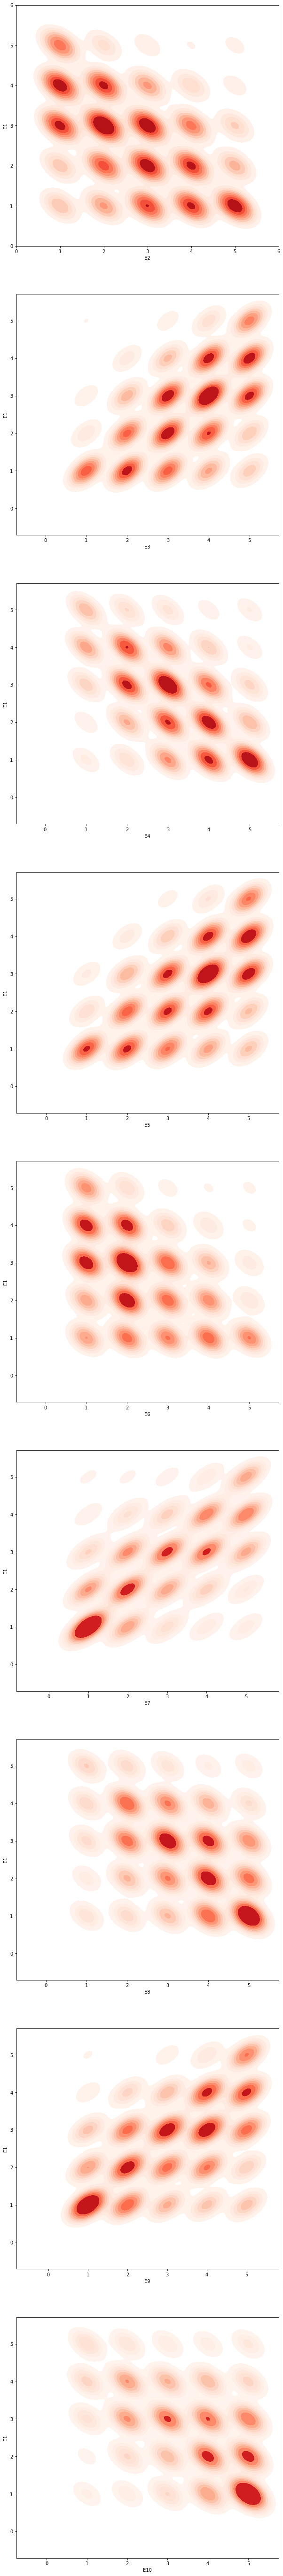

In [9]:
figure, axes = plt.subplots(9, figsize=(10,100))
axes[0].set_xlim(0, 6)
axes[0].set_ylim(0, 6)
columns = list(df_extroversion.columns)[1:10]

for col in columns:
    sns.kdeplot(data = df_extroversion, x=col, y="E1", cmap="Reds", shade=True, ax=axes[columns.index(col)])


In [9]:
# ## Not Working

# fig = make_subplots(rows=9, cols=1)

# columns = list(df_extroversion.columns)[1:10]

# for colm in columns:
#     fig.append_trace(go.Histogram2d(
#         x=df_extroversion[colm],
#         y=df_extroversion["E1"],
#         texttemplate="%{z}"
#     ), row=columns.index(colm)+1, col=1)

# fig.update_layout(height=600, width=600, title_text="Heat Map")
# fig.show()


# ##############################

# # fig = make_subplots(rows=9, cols=1)

# # columns = list(df_extroversion.columns)[1:10]


# fig = go.Figure(go.Histogram2d(
#         x=df_extroversion["E2"],
#         y=df_extroversion["E1"],
#         texttemplate="%{z}"
#     ))

# fig.update_layout(height=600, width=600, title_text="Heat Map")
# fig.show()